### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
print("Missing Values:")
print(reviews.isnull().sum())

Missing Values:
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [4]:
# Explore the data.
print("Shape of the DataFrame:", reviews.shape)

# 2. Data Types
print("Data Types:")
print(reviews.dtypes)

# 3. Column Names
print("Column Names:")
print(reviews.columns)

Shape of the DataFrame: (2000, 11)
Data Types:
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
Column Names:
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')


In [5]:
#Looking for duplicated row
# Count the number of duplicate rows
reviews_duplicates = reviews.duplicated().sum()

# Display the count of duplicate rows
print(f"Number of Duplicate Rows: {reviews_duplicates}")

Number of Duplicate Rows: 0


In [6]:
# Descriptive statistics.
print("Summary Statistics:")
print(reviews.describe().round(2))

Summary Statistics:
           age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.00            2000.00                 2000.00         2000.00   
mean     39.49              48.08                   50.00         1578.03   
std      13.57              23.12                   26.09         1283.24   
min      17.00              12.30                    1.00           25.00   
25%      29.00              30.34                   32.00          772.00   
50%      38.00              47.15                   50.00         1276.00   
75%      49.00              63.96                   73.00         1751.25   
max      72.00             112.34                   99.00         6847.00   

        product  
count   2000.00  
mean    4320.52  
std     3148.94  
min      107.00  
25%     1589.25  
50%     3624.00  
75%     6654.00  
max    11086.00  


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
clean_reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.
clean_reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [8]:
# Rename the column headers.
clean_reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, inplace=True)

# View column names.
clean_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
clean_reviews.to_csv('clean_reviews.csv', index=False)

In [10]:
# Import new CSV file with Pandas and sense-check.
reviews1 = pd.read_csv('clean_reviews.csv')
print(reviews1.shape)
print(reviews1.dtypes)


(2000, 9)
gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


## 5. Linear regression

### 5a) spending vs loyalty

In [11]:
# Independent variable.
X = reviews1['spending_score']

# Dependent variable.
y = reviews1['loyalty_points']

# OLS model and summary.
X = sm.add_constant(X)  # Add constant term
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        17:32:43   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [12]:
# Extract the estimated parameters.
params = model.params

# Extract the standard errors.
std_errors = model.bse

# Extract the predicted values.
predicted_values = model.predict(X)

In [13]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = pd.DataFrame({'Coefficient': params, 'Standard Error': std_errors})

# View the output.
print(regression_table)

                Coefficient  Standard Error
const            -75.052663       45.930554
spending_score    33.061693        0.814419


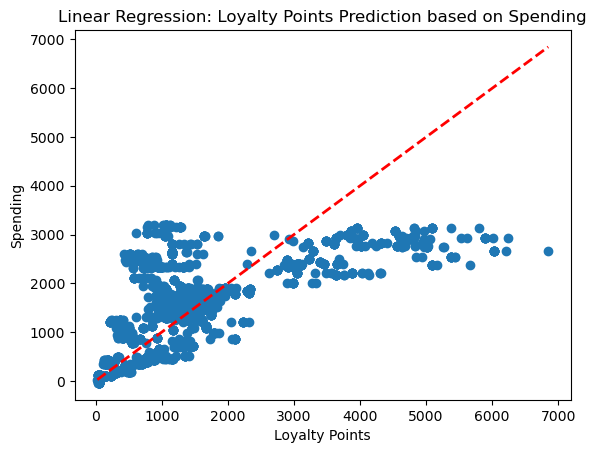

In [14]:
# Plot the graph with a regression line.
plt.scatter(y, predicted_values)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Loyalty Points')
plt.ylabel('Spending')
plt.title('Linear Regression: Loyalty Points Prediction based on Spending')
plt.show()

### 5b) remuneration vs loyalty

In [15]:
# Independent variable.
X1 = reviews1['remuneration']

# Dependent variable.
y1 = reviews1['loyalty_points']

# OLS model and summary.
X1 = sm.add_constant(X1)  # Add constant term
model = sm.OLS(y1, X1).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        17:32:43   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

In [16]:
# Extract the estimated parameters.
params = model.params

# Extract the standard errors.
std_errors = model.bse

# Extract the predicted values.
predicted_values = model.predict(X1)


In [17]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = pd.DataFrame({'Coefficient': params, 'Standard Error': std_errors})

# View the output.
print(regression_table)

              Coefficient  Standard Error
const          -65.686513       52.170717
remuneration    34.187825        0.977925


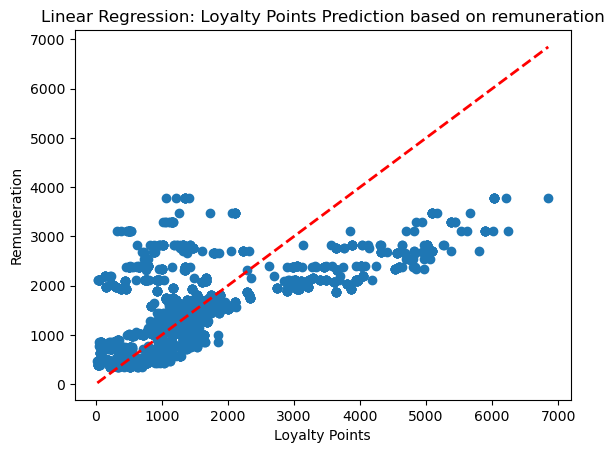

In [18]:
# Plot the graph with a regression line.
plt.scatter(y1, predicted_values)
plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Loyalty Points')
plt.ylabel('Remuneration')
plt.title('Linear Regression: Loyalty Points Prediction based on remuneration')
plt.show()

### 5c) age vs loyalty

In [19]:
# Independent variable (X) is 'age'.
X = reviews1['age']

# Dependent variable (y) is 'loyalty'.
y = reviews1['loyalty_points']

# OLS model and summary.
X = sm.add_constant(X)  # Add a constant term (intercept)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 08 Oct 2023   Prob (F-statistic):             0.0577
Time:                        17:32:43   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [20]:
# Extract the estimated parameters (coefficients).
params = model.params

# Extract the standard errors.
std_errors = model.bse

# Extract the predicted values.
predicted_values = model.predict(X)

In [21]:
# Set the X coefficient and the constant to generate the regression table.


# Create a regression table using a DataFrame.
regression_table = pd.DataFrame({'Coefficient': params, 'Standard Error': std_errors})

# View the output.
print(regression_table)

print("\nPredicted Values:")
print(predicted_values)


       Coefficient  Standard Error
const  1736.517739       88.248731
age      -4.012805        2.113177

Predicted Values:
0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Length: 2000, dtype: float64


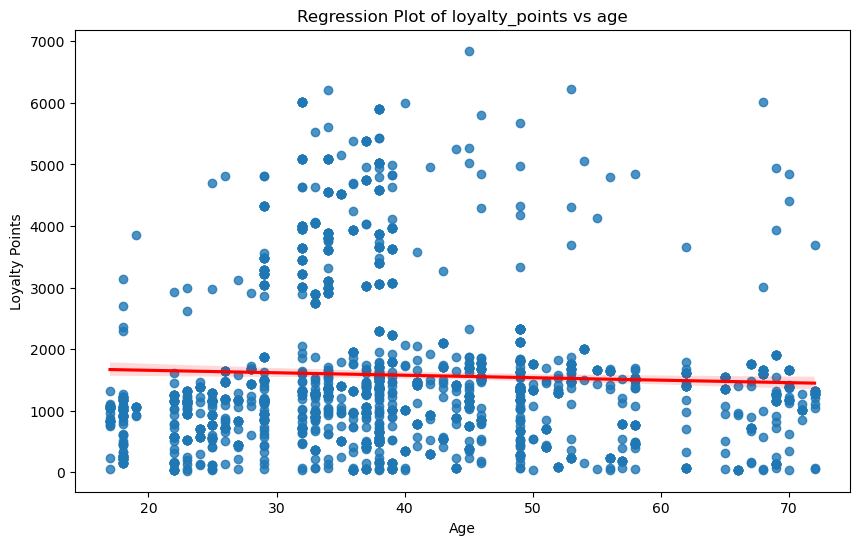

In [22]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='loyalty_points', data=reviews1, line_kws={'color':'red'})
plt.title('Regression Plot of loyalty_points vs age')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.show()

## 6. Observations and insights

- In the regression analyses conducted, spending score exhibited the strongest relationship with loyalty points, explaining 45.2% of its variance (R-squared = 0.452). For every unit increase in spending score, loyalty points increased by approximately 33.06 units. 
- Remuneration also displayed a notable relationship, accounting for 38% of the variance in loyalty points (R-squared = 0.380). A unit increase in remuneration led to an increase of around 34.19 units in loyalty points. 
- In contrast, age had a weak and potentially insignificant relationship with loyalty points, explaining only 0.2% of its variance (R-squared = 0.002), with an approximate decrease of 4.01 loyalty points for each year increase in age.

In regards to the standard errors, these give insights into the reliability of the coefficients.
- For the age model, the standard error for the age coefficient is 2.113177, indicating some uncertainty around the coefficient of -4.012805. This uncertainty is also reflected in the t-value, which is close to the threshold for statistical significance.
- In the spending score model, the standard error is quite low at 0.814419 for the spending_score coefficient, suggesting a high level of precision in the estimate of the 33.0617 coefficient.
- For remuneration, the standard error is 0.977925, implying a good level of precision in the estimate of the 34.1878 coefficient.

In summary, both spending score and remuneration have relatively low standard errors, indicating that their coefficients are estimated with more reliability. On the other hand, age has a higher standard error relative to its coefficient, suggesting a greater uncertainty in its relationship with loyalty points.







# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [23]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load the CSV file(s) as df2.
df = pd.read_csv('clean_reviews.csv')

# View DataFrame.
df

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [25]:
# Drop unnecessary columns.
df2 = df[['remuneration', 'spending_score']]

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [26]:
# Explore the data.
print("Shape of the DataFrame:", df2.shape)

# 2. Data Types
print("Data Types:")
print(df2.dtypes)

# 3. Column Names
print("Column Names:")
print(df2.columns)

Shape of the DataFrame: (2000, 2)
Data Types:
remuneration      float64
spending_score      int64
dtype: object
Column Names:
Index(['remuneration', 'spending_score'], dtype='object')


In [27]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

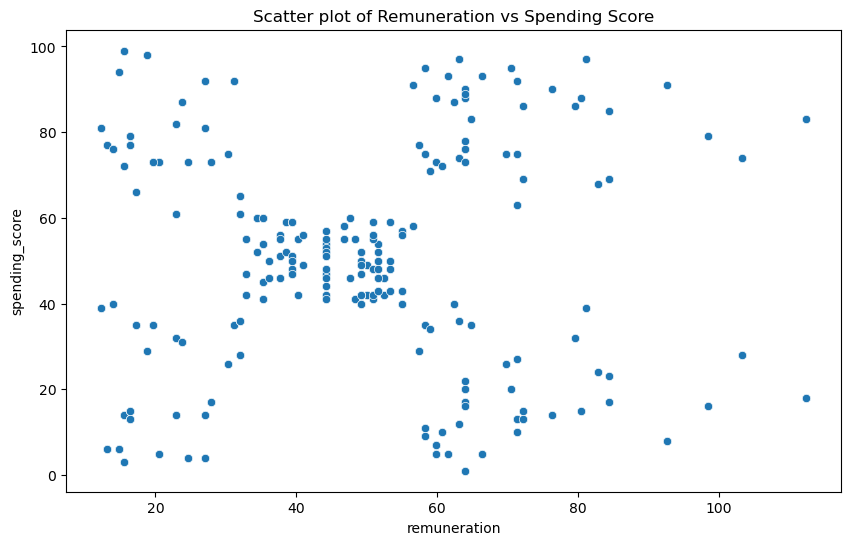

In [28]:
# Create a scatterplot with Seaborn.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='remuneration', y='spending_score', data=df2)
plt.title("Scatter plot of Remuneration vs Spending Score")
plt.show()


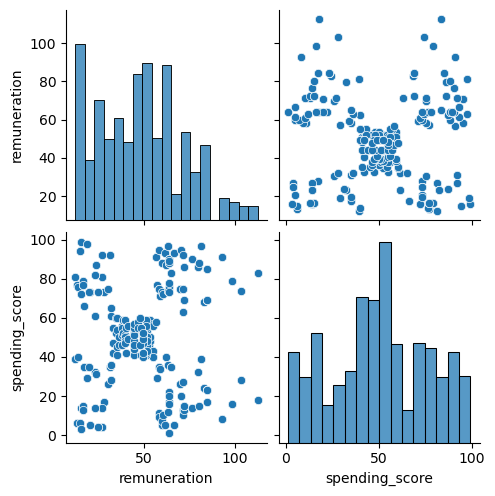

In [29]:
# Create a pairplot with Seaborn.
sns.pairplot(df2)
plt.show()

## 3. Elbow and silhoutte methods

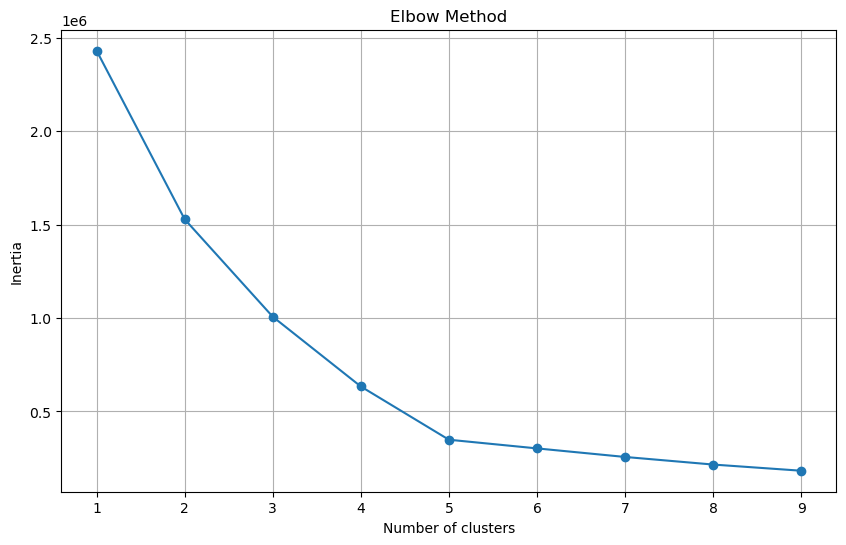

In [30]:
# Determine the number of clusters: Elbow method.
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df2)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


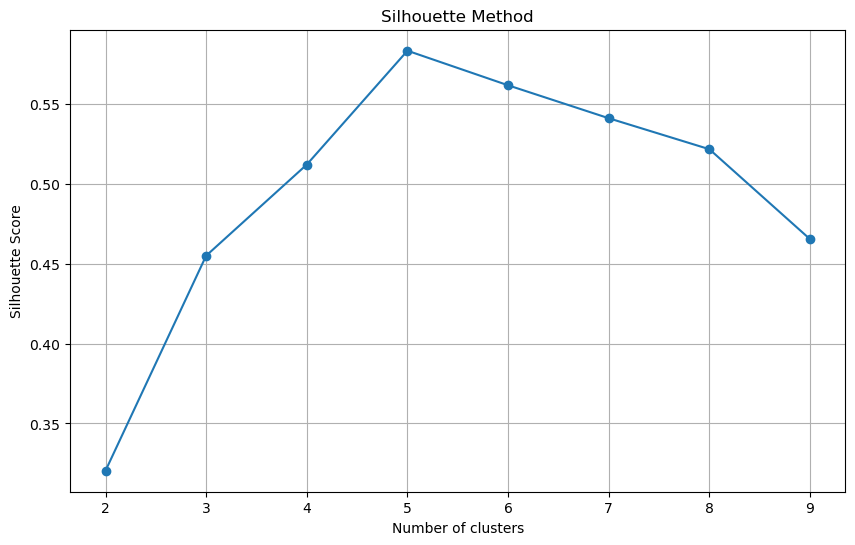

In [31]:
# Determine the number of clusters: Silhouette method.
silhouette_scores = []
range_n_clusters = list(range(2, 10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df2)
    score = silhouette_score(df2, preds)
    silhouette_scores.append(score)

# Plotting Silhouette scores against number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


## 4. Evaluate k-means model at different values of *k*

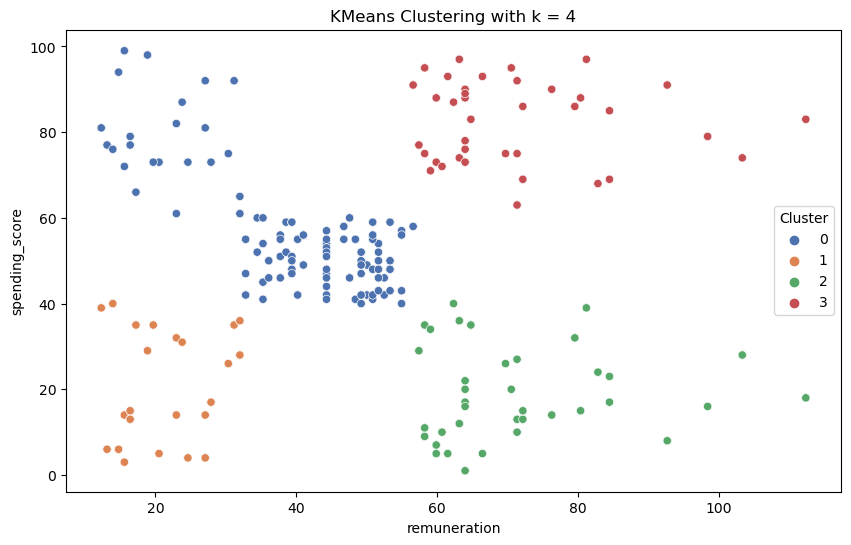

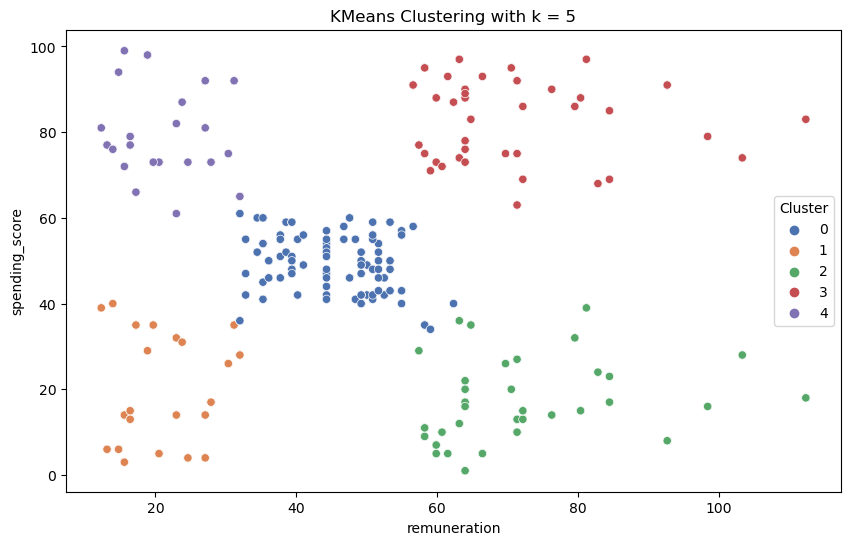

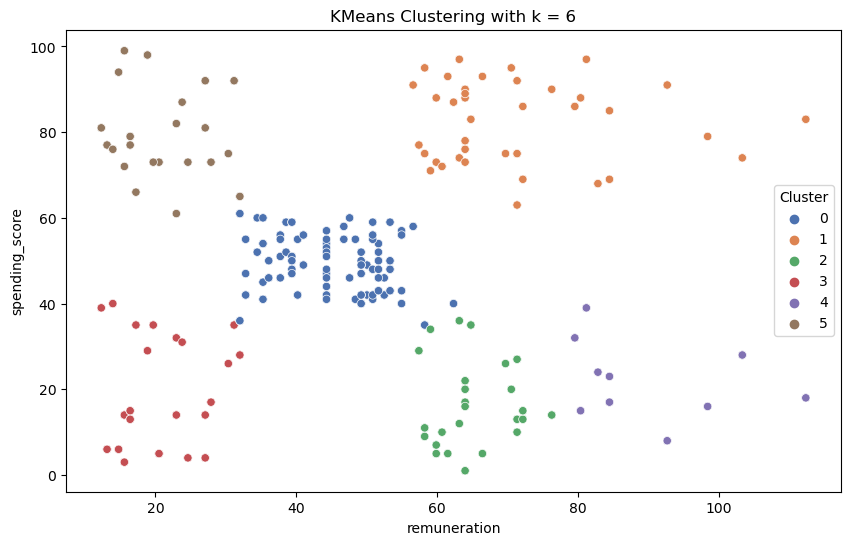

In [32]:
#From the above charts is already clear that k=5 but
#For illustration purposes let's assume k equal to 4,5,6.
for k in [4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df2)
    df2['Cluster'] = kmeans.predict(df2)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='remuneration', y='spending_score', hue='Cluster', data=df2, palette="deep")
    plt.title(f'KMeans Clustering with k = {k}')
    plt.show()


## 5. Fit final model and justify your choice

In [33]:
# Apply the final model.
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=0).fit(df2[['remuneration', 'spending_score']])
df2['Final_Cluster'] = kmeans_final.predict(df2[['remuneration', 'spending_score']])

In [34]:
# Check the number of observations per predicted class.
print(df2['Final_Cluster'].value_counts())

#Percentage
# Total number of observations
total_observations = df2['Final_Cluster'].count()

# Calculate the percentage for each cluster
percentages = (df2['Final_Cluster'].value_counts() / total_observations) * 100

# Display the percentages
percentages


0    774
3    356
2    330
1    271
4    269
Name: Final_Cluster, dtype: int64


0    38.70
3    17.80
2    16.50
1    13.55
4    13.45
Name: Final_Cluster, dtype: float64

## 6. Plot and interpret the clusters

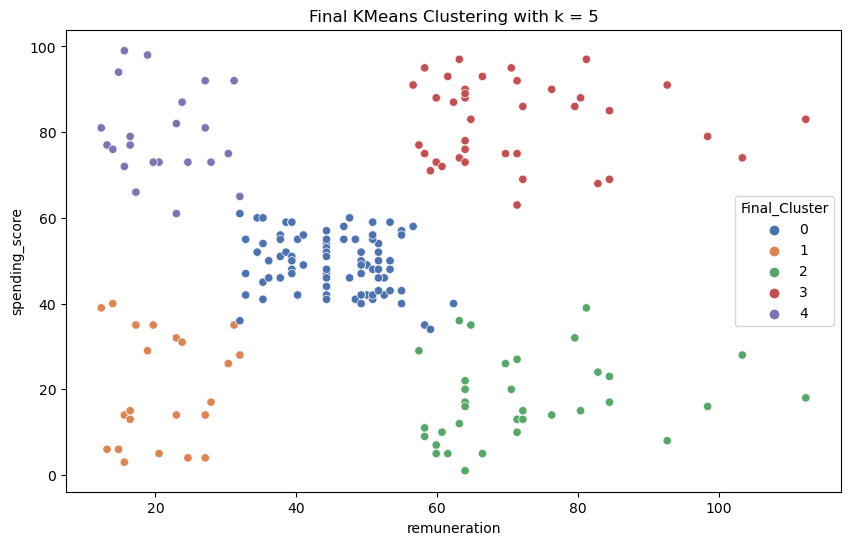

,remuneration,spending_score,Final_Cluster
0,12.30,39,1
1,12.30,81,4
2,13.12,6,1
3,13.12,77,4
4,13.94,40,1
...,...,...,...
1995,84.46,69,3
1996,92.66,8,2
1997,92.66,91,3
1998,98.40,16,2


In [35]:
# Visualising the clusters.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remuneration', y='spending_score', hue='Final_Cluster', data=df2, palette="deep")
plt.title(f'Final KMeans Clustering with k = {optimal_k}')
plt.show()


#drop column cluster, we don't need it anymore
df2 = df2.drop(columns=['Cluster'])
# View the DataFrame.
df2

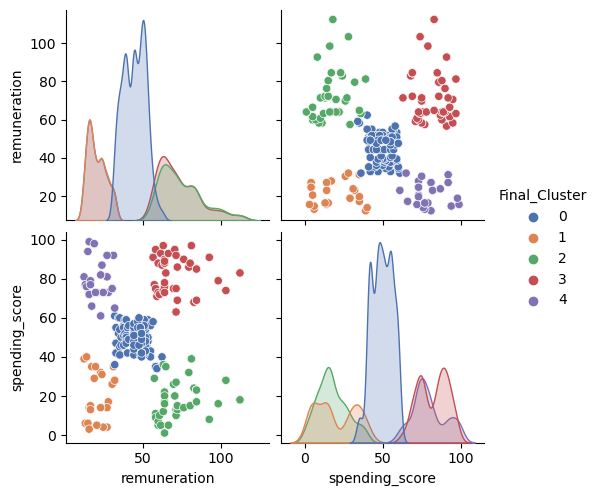

In [36]:
# Create a CSV file as output.
df2.to_csv('k_results.csv', index=False)


# Plotting the pairplot
sns.pairplot(df2, hue='Final_Cluster', palette="deep", diag_kind="kde")
plt.show()

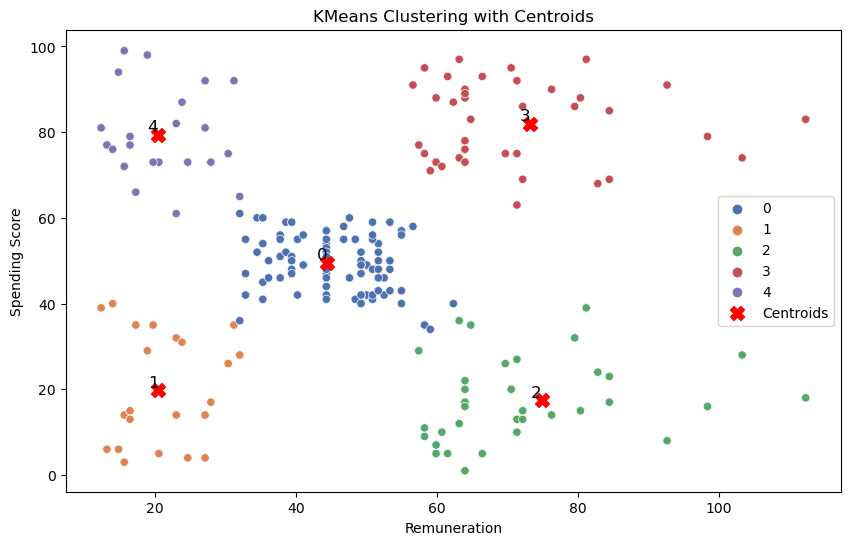

In [37]:
#plot centroides to visualise the "central tendencies" of each cluster

# Fit the KMeans algorithm to the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df2[['remuneration', 'spending_score']])

# Extract the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remuneration', y='spending_score', hue='Final_Cluster', data=df2, palette="deep")

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

# Add titles and labels
plt.title('KMeans Clustering with Centroids')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
# Annotate the cluster numbers
for i, (x, y) in enumerate(centroids):
    plt.text(x, y, str(i), fontsize=12, ha='right', va='bottom', color='black')

plt.legend()
plt.show()

In [38]:
#Determining outliers with Interquartile Range (IQR) method.
# Calculate Q1, Q3 and IQR for 'remuneration'
Q1_remu = df2['remuneration'].quantile(0.25)
Q3_remu = df2['remuneration'].quantile(0.75)
IQR_remu = Q3_remu - Q1_remu

# Define bounds for outliers
lower_bound_remu = Q1_remu - 1.5 * IQR_remu
upper_bound_remu = Q3_remu + 1.5 * IQR_remu

# Calculate outliers for 'remuneration'
outliers_remu = df2[(df2['remuneration'] < lower_bound_remu) | (df2['remuneration'] > upper_bound_remu)]

# Calculate Q1, Q3 and IQR for 'spending_score'
Q1_score = df2['spending_score'].quantile(0.25)
Q3_score = df2['spending_score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

# Define bounds for outliers
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

# Calculate outliers for 'spending_score'
outliers_score = df2[(df2['spending_score'] < lower_bound_score) | (df2['spending_score'] > upper_bound_score)]

# Print count of outliers
print(f"Number of outliers in 'remuneration': {len(outliers_remu)}")
print(f"Number of outliers in 'spending_score': {len(outliers_score)}")


Number of outliers in 'remuneration': 0
Number of outliers in 'spending_score': 0


## 7. Discuss: Insights and observations


The scatter plot highlighted visually discernible clusters in the data, which the elbow and silhouette methods further confirmed, both suggesting an optimal k of 5 for clustering. Testing with k values of 4 and 6 further reinforced that k=5 was indeed the best choice. This dataset focuses on two variables: remuneration and spending_score. The clear visual distinction in the initial scatter plot already hinted at a natural segmentation, which was then verified by the aforementioned methods.

After employing k-means clustering, we identified five unique customer segments. These segments' sizes vary significantly, with the largest encompassing 774 observations and the smallest 269. Interestingly, an outlier analysis using the IQR method did not detect any anomalies, meaning the clustering was not influenced by extreme data points.



# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [39]:
# Import all the necessary packages.
from textblob import TextBlob
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load the data set as df3.
df3 = df[['review', 'summary']]

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [41]:
# Explore data set.
df3.describe()

,review,summary
count,2000,2000
unique,1980,1432
top,love it,Five Stars
freq,5,378


In [42]:
# Determine if there are any missing values.
print("Missing Values:")
print(df3.isnull().sum())

Missing Values:
review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [43]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].str.lower()

In [44]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].str.lower()

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [45]:
# Replace all the punctuations in review column.
import string
df3['review'] = df3['review'].str.replace(f"[{string.punctuation}]", '')

# View output.
df3['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9\n\nyour unpainted...
2       nice art nice printing  why two panels are fil...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game  did not think i would like it when...
1997            great game for all\nkeeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [46]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace(f"[{string.punctuation}]", '')

# View output.
df3['summary'] 

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [47]:
# Drop duplicates in both columns.
df3.drop_duplicates(subset=['review', 'summary'], inplace=True)

# View DataFrame.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [48]:
# Create new DataFrame (copy DataFrame).
df_copy = df3.copy()

# View DataFrame.
df_copy

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


In [49]:
# Apply tokenisation to both columns.
df_copy['review'] = df_copy['review'].str.split()
df_copy['summary'] = df_copy['summary'].str.split()

# View DataFrame.
df_copy

,review,summary
0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...
1995,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1996,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1997,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1998,"[fun, game]","[four, stars]"


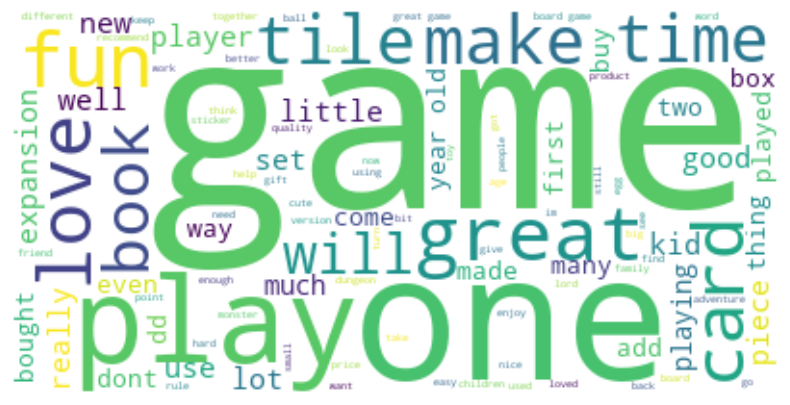

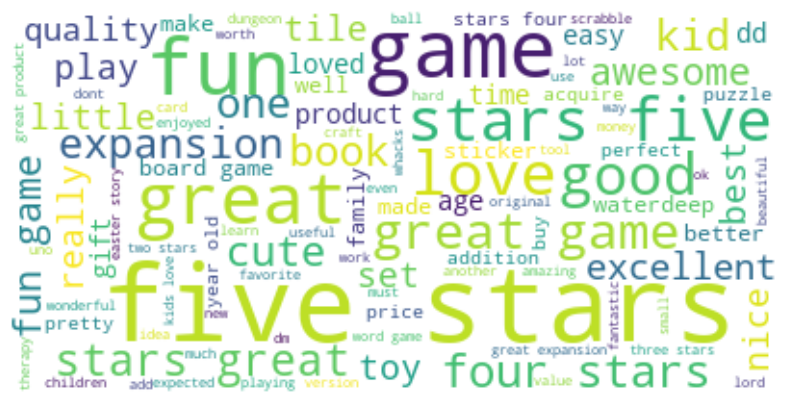

In [52]:
# Convert the tokenized words back to strings for word cloud generation
df_copy['review_str'] = df_copy['review'].apply(' '.join)
df_copy['summary_str'] = df_copy['summary'].apply(' '.join)

# Generate word clouds
plot_wordcloud(' '.join(df_copy['review_str'].dropna()))
plot_wordcloud(' '.join(df_copy['summary_str'].dropna()))

# Create a word cloud.
def plot_wordcloud(text):
    wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [73]:
# Determine the frequency distribution.
all_words_review = [word for tokens in df_copy['review'] for word in tokens]
freq_dist_review = FreqDist(all_words_review)

### 4b) Remove alphanumeric characters and stopwords

In [54]:
# Delete all the alpanum and stopwords
filtered_words = [word for word in all_words_review if word.isalpha() and word not in stopwords.words('english')]
filtered_freq_dist = FreqDist(filtered_words)

### 4c) Create wordcloud without stopwords

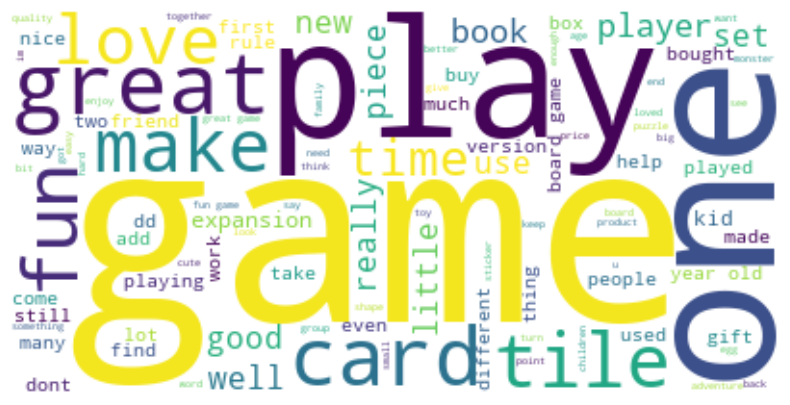

In [55]:
# Create a wordcloud without stop words.
plot_wordcloud(' '.join(filtered_words))

### 4d) Identify 15 most common words and polarity

In [56]:
# Identify 15 most common words and polarity
top_15 = filtered_freq_dist.most_common(15)
print(top_15)

for word, freq in top_15:
    print(f"{word}: {TextBlob(word).sentiment.polarity}")

[('game', 1671), ('great', 580), ('fun', 552), ('one', 530), ('play', 502), ('like', 414), ('love', 323), ('really', 319), ('get', 319), ('cards', 301), ('tiles', 297), ('time', 291), ('good', 289), ('would', 280), ('book', 273)]
game: -0.4
great: 0.8
fun: 0.3
one: 0.0
play: 0.0
like: 0.0
love: 0.5
really: 0.2
get: 0.0
cards: 0.0
tiles: 0.0
time: 0.0
good: 0.7
would: 0.0
book: 0.0


Interpretation of sentiment values for the given words:

- game: A sentiment score of -0.4 suggests a negative connotation. This is a bit surprising since "game" is a neutral word. This might be due to various reasons; one could be the pre-trained model used by TextBlob making an inaccurate prediction for the word "game" in isolation.
- great: As expected, this word has a high positive polarity of 0.8, indicating it's used in a positive context in reviews.
- fun: Another positive word with a sentiment score of 0.3.
- love: A sentiment score of 0.5 indicates positive sentiment.
- really: This has a sentiment score of 0.2, indicating a slightly positive connotation, though "really" is often considered neutral.
- good: This word has a positive polarity of 0.7.
- Most of the words (one, play, like, get, cards, tiles, time, would, book) have a sentiment score of 0.0, suggesting they are neutral in sentiment.

Considering dropping the word 'game' could be useful as it's a domain-specific term (Turtle games) that may not offer unique insights into sentiment or content because of its ubiquity.
Additionally as observed, the word "game" has a sentiment score of -0.4 when analyzed in isolation, which is counterintuitive and might not reflect its true sentiment in the context of the reviews. 

By removing such high-frequency, domain-specific terms, the sentiment analysis can potentially become more accurate and focused on other descriptive words that provide more insight into the sentiment of the review.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [59]:
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    text = ' '.join(comment)  # Joining the tokenized words into a single string
    return TextBlob(text).sentiment[0]


# Determine polarity of both columns. 
df_copy['review_polarity'] = df_copy['review'].apply(generate_polarity)
df_copy['summary_polarity'] = df_copy['summary'].apply(generate_polarity)

# View output.
df_copy

,review,summary,review_str,summary_str,review_polarity,summary_polarity
0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.150000
1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.800000
2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.000000
3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.000000
4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",as my review of gf9s previous screens these we...,money trap,-0.316667,0.000000
...,...,...,...,...,...,...
1995,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w...",the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,0.168750,0.200000
1996,"[great, game, did, not, think, i, would, like,...","[super, fun]",great game did not think i would like it when ...,super fun,0.158333,0.316667
1997,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]",great game for all keeps the mind nimble,great game,0.200000,0.200000
1998,"[fun, game]","[four, stars]",fun game,four stars,-0.050000,0.000000


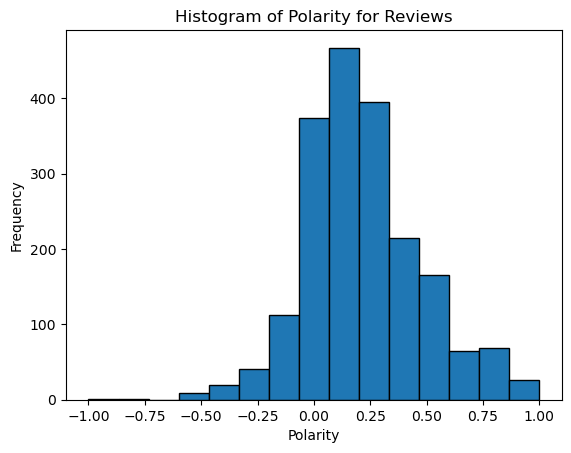

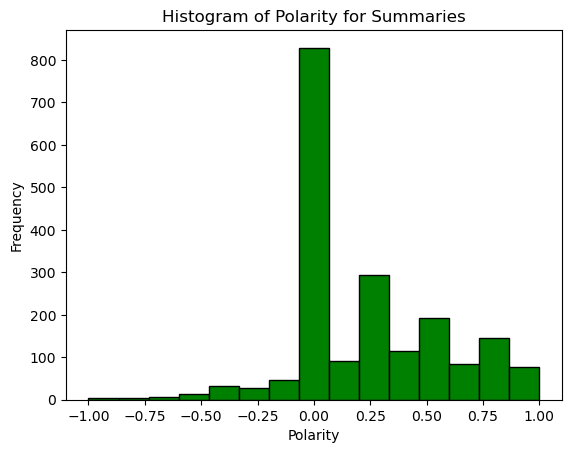

,review_polarity,summary_polarity
count,1961.000000,1961.000000
mean,0.213170,0.223678
std,0.260360,0.337507
min,-1.000000,-1.000000
25%,0.045833,0.000000
50%,0.177222,0.100000
75%,0.351562,0.475000
max,1.000000,1.000000


In [77]:
# Review: Create a histogram plot with bins = 15.
# For the 'review' column
plt.hist(df_copy['review_polarity'], bins=15, edgecolor='black')
plt.title('Histogram of Polarity for Reviews')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# For the 'summary' column
plt.hist(df_copy['summary_polarity'], bins=15, color='green', edgecolor='black')
plt.title('Histogram of Polarity for Summaries')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

df_copy.describe()


Distribution:
Both review_polarity and summary_polarity have values ranging from -1 to +1. This range is typical for sentiment analysis, where -1 represents highly negative sentiment, 0 is neutral, and +1 is highly positive sentiment.
Central Tendency:

The average (mean) sentiment score for reviews (review_polarity) is approximately 0.213, suggesting that, on average, the reviews have a slightly positive sentiment.
The average sentiment score for summaries (summary_polarity) is approximately 0.224, which is also slightly positive and very close to the mean sentiment of the reviews. This indicates that the summaries generally reflect the sentiment of the reviews quite well.

Variability:
The standard deviation for review_polarity is 0.260, while for summary_polarity it's 0.338. This suggests that there's a bit more variability in the sentiment of the summaries compared to the full reviews.

Outliers and Spread:
The median (50th percentile) sentiment for reviews is around 0.177, which is below the mean, indicating that the distribution might be slightly skewed to the right (positive skew).
Similarly, the median sentiment for summaries is 0.1, which is also below its mean, suggesting a positive skew for the summaries as well as it is also noticeble from the histograms.
The Interquartile Range (IQR) for reviews is roughly 0.306 (0.3516 - 0.0458), and for summaries, it's 0.475. The wider IQR for summaries suggests more variability in the middle 50% of the data.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [64]:
# Top 20 negative reviews
top_20_negative_reviews = df_copy.nsmallest(20, 'review_polarity')[['review_str', 'review_polarity']]

# View output.
top_20_negative_reviews 

,review,review_polarity
208,"[booo, unles, you, are, patient, know, how, to...",-1.000000
182,"[incomplete, kit, very, disappointing]",-0.780000
1804,"[im, sorry, i, just, find, this, product, to, ...",-0.583333
364,"[one, of, my, staff, will, be, using, this, ga...",-0.550000
117,"[i, bought, this, as, a, christmas, gift, for,...",-0.500000
227,"[this, was, a, gift, for, my, daughter, i, fou...",-0.500000
230,"[i, found, the, directions, difficult]",-0.500000
290,"[instructions, are, complicated, to, follow]",-0.500000
301,[difficult],-0.500000
1524,"[expensive, for, what, you, get]",-0.500000


As previously identified, the word "game" had a sentiment score (or polarity) of -0.4. This is somewhat counterintuitive given that "game" is a neutral word in most contexts, especially in product reviews related to games.

If "game" is indeed the predominant word in those reviews and the sentiment scoring tool assigned a negative value to it, then it can skew the overall sentiment of reviews that are otherwise positive. It's especially noticeable in shorter reviews where there aren't enough other positive words to counterbalance the negative weight of the word "game."

This emphasizes the importance of ensuring that domain-specific words (like "game" in a context of gaming reviews) are given appropriate sentiment weights. It's also a strong argument for considering the removal or special treatment of domain-specific neutral terms when calculating sentiment, especially if they are erroneously assigned a strong sentiment value.

To test this hypothesis, we could:

Remove or neutralize the word "game" and then reassess sentiment to see if there's a notable difference in scores.
Review the sentiment dictionary (if using a predefined one) to see how different terms are weighted. Adjust weights if needed based on domain knowledge.

In [68]:
# Top 20 negative summaries.
top_20_negative_summaries = df_copy.nsmallest(20, 'summary_polarity')[['summary_str', 'summary_polarity']]

# View output.
top_20_negative_summaries

,summary_str,summary_polarity
21,the worst value ive ever seen,-1.000000
208,boring unless you are a craft person which i am,-1.000000
829,boring,-1.000000
1166,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
144,disappointed,-0.750000
631,disappointed,-0.750000
793,disappointed,-0.750000
1620,disappointed,-0.750000
363,promotes anger instead of teaching calming met...,-0.700000


In [69]:
# Top 20 positive reviews
top_20_positive_reviews = df_copy.nlargest(20, 'review_polarity')[['review_str', 'review_polarity']]
# View output.
top_20_positive_reviews

,review_str,review_polarity
7,came in perfect condition,1.0
165,awesome book,1.0
194,awesome gift,1.0
496,excellent activity for teaching selfmanagement...,1.0
524,perfect just what i ordered,1.0
591,wonderful product,1.0
609,delightful product,1.0
621,wonderful for my grandson to learn the resurre...,1.0
790,perfect,1.0
933,awesome,1.0


In [71]:
# Top 20 positive summaries
top_20_positive_summaries = df_copy.nlargest(20, 'summary_polarity')[['summary_str', 'summary_polarity']]

# View output.
top_20_positive_summaries

,summary_str,summary_polarity
6,best gm screen ever,1.0
28,wonderful designs,1.0
32,perfect,1.0
80,theyre the perfect size to keep in the car or ...,1.0
134,perfect for preschooler,1.0
140,awesome sticker activity for the price,1.0
161,awesome book,1.0
163,he was very happy with his gift,1.0
187,awesome,1.0
210,awesome and welldesigned for 9 year olds,1.0


## 7. Discuss: Insights and observations

- Sentiment Values Interpretation:
The word "game" showed a surprising negative sentiment score of -0.4, even though it's typically a neutral term. This deviation may arise from limitations in the pre-trained model of TextBlob.
Words like "great", "fun", "love", "really", and "good" had expected positive sentiment scores ranging from 0.2 to 0.8.
Several words (e.g., "one", "play", "like") were rightly assessed as neutral, having sentiment scores of 0.0.
Given the skewed sentiment score of "game", considering its removal from the dataset might provide a clearer sentiment overview. This word, being a domain-specific term (pertaining to Turtle games), could be skewing sentiment outcomes due to its prevalent use and inaccurate standalone sentiment score.

- Histogram Insights:
Both review and summary polarities span from -1 (highly negative) to +1 (highly positive).

- Central Tendency:
Both reviews and summaries lean towards a positive sentiment, with mean scores of 0.213 and 0.224, respectively. The similarities suggest that summaries are representative of the reviews.

- Variability:
Summaries exhibit slightly more sentiment variability than reviews, with standard deviations of 0.338 and 0.260, respectively.

- Outliers and Distribution Spread:
Both reviews and summaries are positively skewed, as their medians (0.177 and 0.1) are below their respective means.
Summaries possess a broader interquartile range (IQR) than reviews, suggesting more sentiment variability within their middle 50% data range.

- Insights from Top 20 Negative Reviews:
The negative sentiment score associated with the word "game" may distort the overall sentiment of otherwise neutral or positive reviews. This anomaly emphasizes the importance of accurate sentiment weights for domain-specific terms.
To refine sentiment evaluation:
The word "game" could be removed or treated neutrally for sentiment re-assessment.
The sentiment dictionary's weights can be reviewed and adjusted based on domain relevance and expertise.
In essence, while the provided sentiment analysis method offers valuable insights, domain-specific quirks (like the anomalous sentiment score of "game") emphasize the need for periodic review and adjustment of sentiment evaluation techniques.

# 